In [15]:
#%pip install pm4py

In [16]:
import pandas as pd
import pm4py

In [17]:
file_path="burgers.csv"
event_log = pd.read_csv(file_path, sep=',')
#file_path="running-example.csv"
#event_log = pd.read_csv(file_path, sep=';')
#event_log
num_events = len(event_log)
num_cases = len(event_log.case_id.unique())
print("Number of events: {}\nNumber of cases: {}".format(num_events, num_cases))

Number of events: 15
Number of cases: 2


In [18]:
event_log = pm4py.format_dataframe(event_log, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
start_activities = pm4py.get_start_activities(event_log)
end_activities = pm4py.get_end_activities(event_log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))
    

Start activities: {'Take Order': 2}
End activities: {'Deliver Order': 2}


In [19]:
process_tree = pm4py.discover_process_tree_inductive(event_log)
print(process_tree)

->( 'Take Order', +( 'Register Payment Method', 'Note Address of Customer' ), 'Prepare Burger', X( tau, 'Grab Soda' ), 'Put Burger in Box', 'Wrap Order', 'Deliver Order' )


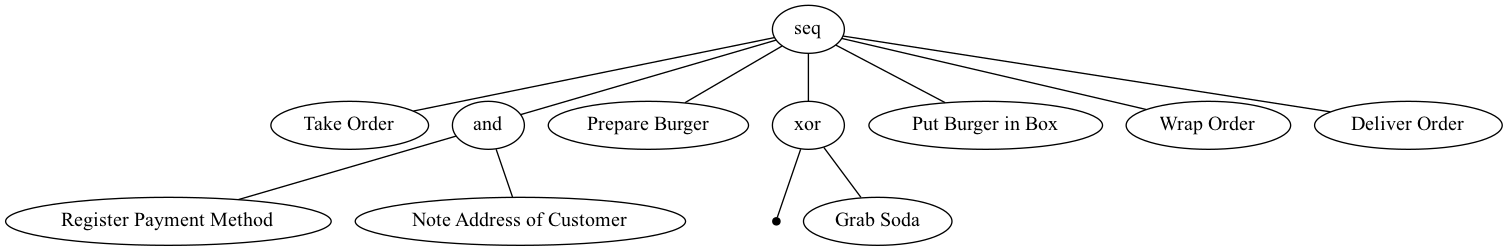

In [20]:
from pm4py.visualization.process_tree import visualizer as pt_visualizer
gviz = pt_visualizer.apply(process_tree, parameters={pt_visualizer.Variants.WO_DECORATION.value.Parameters.FORMAT: "png"})
pt_visualizer.view(gviz)

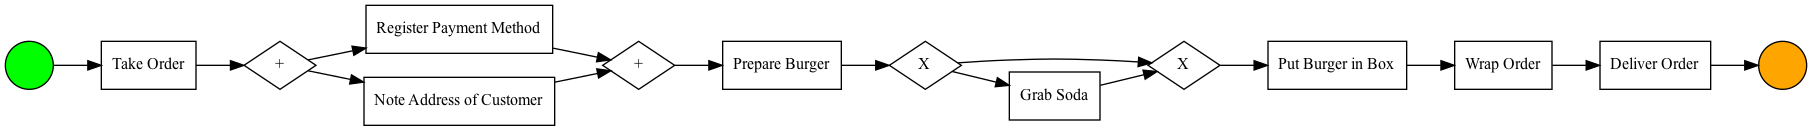

In [21]:
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)

/Users/andrea/Documents/python_envs/env_pda_2022/lib/python3.9/site-packages/pm4py/algo/discovery/dfg/adapters/pandas/df_statistics.py:82: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_reduced = df[{case_id_glue, activity_key, target_activity_key}]


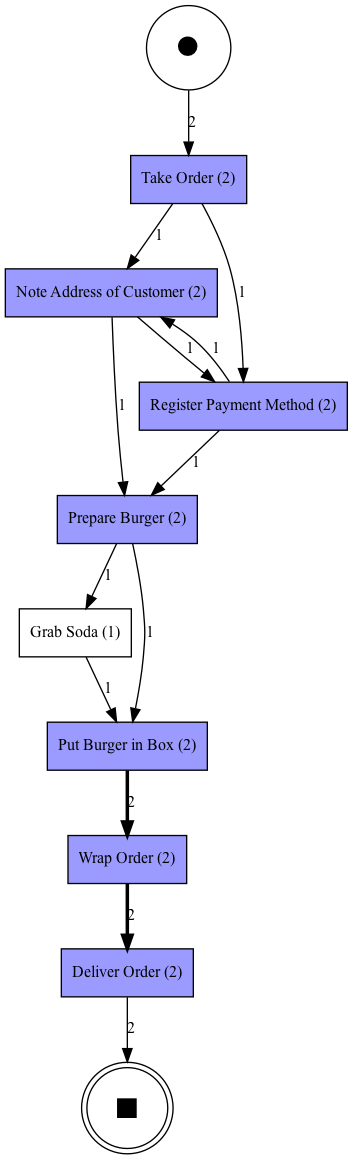

In [22]:
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)
pm4py.view_dfg(dfg, start_activities, end_activities)